In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime

In [2]:
company= 'AXISBANK.NS'
startDate= '2021-08-25'
endDate= '2023-08-10'

In [3]:
df= yf.download(company, interval='1h', start=startDate, end= endDate)
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   
Datetime                                                                    
2021-08-25 09:15:00+05:30  748.950012  751.400024  745.349976  747.400024  \
2021-08-25 10:15:00+05:30  747.400024  747.799988  742.750000  742.849976   
2021-08-25 11:15:00+05:30  742.950012  747.900024  740.000000  740.500000   
2021-08-25 12:15:00+05:30  740.549988  741.799988  737.400024  738.000000   
2021-08-25 13:15:00+05:30  738.150024  740.299988  737.400024  738.049988   
...                               ...         ...         ...         ...   
2023-08-09 11:15:00+05:30  945.500000  946.549988  944.299988  945.000000   
2023-08-09 12:15:00+05:30  944.950012  952.000000  944.500000  947.650024   
2023-08-09 13:15:00+05:30  947.599976  949.849976  946.049988  947.799988   
2023-08-09 14:15:00+05:30  947.799988  953.099976  946.599976  950.900024   
2023-08-09 15:15:00+05:30  950.900024  951.450012  948.549988  950.000000   

                            Adj Close   Volume  
Datetime                                        
2021-08-25 09:15:00+05:30  747.400024        0  
2021-08-25 10:15:00+05:30  742.849976   927194  
2021-08-25 11:15:00+05:30  740.500000   925161  
2021-08-25 12:15:00+05:30  738.000000  1461995  
2021-08-25 13:15:00+05:30  738.049988   665886  
...                               ...      ...  
2023-08-09 11:15:00+05:30  945.000000   997003  
2023-08-09 12:15:00+05:30  947.650024  1694621  
2023-08-09 13:15:00+05:30  947.799988   910731  
2023-08-09 14:15:00+05:30  950.900024  1691168  
2023-08-09 15:15:00+05:30  950.000000   480324  

[3388 rows x 6 columns]

In [4]:
trainSet= df.iloc[:, 1:2].values

In [5]:
df.shape

(3388, 6)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))

In [7]:
trainingSetScaled= scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [8]:
xTRAIN = []
yTRAIN = []

for i in range(100, len(trainingSetScaled)):
    xTRAIN.append(trainingSetScaled[i-60:i, 0])
    yTRAIN.append(trainingSetScaled[i, 0])
    
xTRAIN, yTRAIN= np.array(xTRAIN), np.array(yTRAIN)

In [9]:
xTRAIN= np.reshape(xTRAIN, newshape=(xTRAIN.shape[0], xTRAIN.shape[1], 1))

In [10]:
trainingSetScaled.shape

(3388, 1)

In [11]:
xTRAIN.shape

(3288, 60, 1)

In [12]:
yTRAIN.shape

(3288,)

In [13]:
import tensorflow as tf
from tensorflow import keras


if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

In [14]:
regressor= keras.models.Sequential([
    keras.layers.LSTM(units=64, return_sequences= True, input_shape= (xTRAIN.shape[1], 1)),
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50, return_sequences= True), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.LSTM(units=50), 
    keras.layers.Dropout(rate= 0.2),
    keras.layers.Dense(units= 1)
])

In [15]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            23000     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [16]:
regressor.compile(optimizer= 'adam', loss= keras.losses.mean_squared_error, metrics=['accuracy'])

In [17]:
regressor.fit(x= xTRAIN, y=yTRAIN, batch_size= 32, epochs= 120)

Epoch 1/120
93/93 [==============================] - 11s 31ms/step - loss: 0.0176 - accuracy: 6.7431e-04
Epoch 2/120
93/93 [==============================] - 3s 34ms/step - loss: 0.0044 - accuracy: 6.7431e-04
Epoch 3/120
93/93 [==============================] - 3s 34ms/step - loss: 0.0039 - accuracy: 6.7431e-04
Epoch 4/120
93/93 [==============================] - 3s 34ms/step - loss: 0.0039 - accuracy: 6.7431e-04
Epoch 5/120
93/93 [==============================] - 3s 36ms/step - loss: 0.0034 - accuracy: 6.7431e-04
Epoch 6/120
93/93 [==============================] - 3s 35ms/step - loss: 0.0030 - accuracy: 6.7431e-04
Epoch 7/120
93/93 [==============================] - 2s 25ms/step - loss: 0.0028 - accuracy: 6.7431e-04
Epoch 8/120
93/93 [==============================] - 2s 25ms/step - loss: 0.0029 - accuracy: 6.7431e-04
Epoch 9/120
93/93 [==============================] - 2s 25ms/step - loss: 0.0028 - accuracy: 6.7431e-04
Epoch 10/120
93/93 [==============================] - 2s 25ms/s

In [18]:
prdctn= regressor.predict(xTRAIN)

93/93 [==============================] - 6s 24ms/step


regressor.save(f"../model/exports/{company}/")

In [19]:
testDF= yf.download(company, period='1d', start=endDate, end=datetime.datetime.now())
testDF

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close   
Date                                                                     
2023-06-01  922.000000  930.950012  916.049988  919.700012  917.811829  \
2023-06-02  922.650024  930.500000  920.250000  926.099976  924.198669   
2023-06-05  927.599976  953.900024  927.599976  950.849976  948.897827   
2023-06-06  951.099976  970.750000  951.099976  968.200012  966.212280   
2023-06-07  972.950012  981.250000  968.099976  976.750000  974.744690   
2023-06-08  973.049988  974.849976  959.900024  962.099976  960.124756   
2023-06-09  967.000000  981.700012  963.299988  974.750000  972.748840   
2023-06-12  973.000000  977.900024  968.599976  974.200012  972.199951   
2023-06-13  974.299988  989.700012  974.299988  985.849976  983.825989   
2023-06-14  986.000000  988.200012  976.000000  977.700012  975.692749   
2023-06-15  988.349976  989.000000  972.200012  977.150024  975.143860   
2023-06-16  982.799988  985.450012  977.200012  981.549988  979.534851   
2023-06-19  983.849976  986.000000  961.000000  965.650024  963.667542   
2023-06-20  965.950012  977.000000  958.549988  974.849976  972.848572   
2023-06-21  978.299988  978.299988  963.150024  966.000000  964.016785   
2023-06-22  962.200012  973.450012  958.700012  966.599976  964.615540   
2023-06-23  960.000000  965.500000  954.549988  958.400024  956.432434   
2023-06-26  959.500000  963.500000  953.099976  960.549988  958.577942   
2023-06-27  967.000000  976.000000  960.799988  973.250000  971.251892   
2023-06-28  973.250000  973.250000  973.250000  973.250000  971.251892   
2023-06-30  977.099976  989.849976  976.000000  987.450012  985.422729   
2023-07-03  990.000000  990.000000  978.000000  982.099976  980.083679   
2023-07-04  982.099976  984.849976  969.000000  970.700012  968.707092   
2023-07-05  969.000000  975.500000  962.099976  966.500000  964.515686   
2023-07-06  961.000000  986.099976  961.000000  980.950012  979.950012   
2023-07-07  976.250000  989.450012  971.799988  976.700012  976.700012   
2023-07-10  976.700012  986.000000  960.400024  964.049988  964.049988   
2023-07-11  967.900024  971.750000  950.599976  953.200012  953.200012   
2023-07-12  956.700012  957.549988  947.000000  950.000000  950.000000   
2023-07-13  956.299988  966.000000  952.150024  960.150024  960.150024   
2023-07-14  964.450012  967.000000  947.750000  957.049988  957.049988   
2023-07-17  960.000000  968.900024  950.450012  964.849976  964.849976   
2023-07-18  964.000000  979.950012  951.299988  963.650024  963.650024   
2023-07-19  964.000000  969.900024  956.500000  964.299988  964.299988   
2023-07-20  963.900024  979.900024  957.599976  977.900024  977.900024   
2023-07-21  971.599976  985.000000  968.000000  971.299988  971.299988   
2023-07-24  973.450012  984.950012  968.799988  971.500000  971.500000   
2023-07-25  977.650024  977.650024  953.799988  962.500000  962.500000   
2023-07-26  966.849976  980.000000  963.299988  976.799988  976.799988   
2023-07-27  989.349976  990.000000  955.750000  959.900024  959.900024   
2023-07-28  959.900024  969.750000  942.200012  949.950012  949.950012   
2023-07-31  954.700012  958.599976  948.299988  953.900024  953.900024   
2023-08-01  956.000000  964.000000  952.000000  959.900024  959.900024   
2023-08-02  951.500000  958.900024  936.599976  945.250000  945.250000   
2023-08-03  944.099976  946.599976  927.150024  935.549988  935.549988   
2023-08-04  947.000000  954.849976  934.650024  952.250000  952.250000   
2023-08-07  952.250000  955.000000  944.549988  947.400024  947.400024   
2023-08-08  950.000000  959.900024  944.049988  952.900024  952.900024   
2023-08-09  952.000000  953.299988  944.299988  950.000000  950.000000   
2023-08-10  948.000000  951.950012  937.299988  939.750000  939.750000   
2023-08-11  937.500000  945.700012  933.000000  937.200012  937.200012   
2023-08-14  935.000000  943.299988  928.900024  939.950012  939.950012   
2023-08-16  935.950012

In [20]:
realCP= testDF['Close'].values

In [21]:
dfTotal= pd.concat((df['Close'], testDF['Close']), axis=0)

In [22]:
modelInp= dfTotal[len(dfTotal)-len(testDF)-60:].values

In [23]:
modelInp= modelInp.reshape(-1,1)

In [24]:
modelInp= scaler.transform(modelInp)

In [25]:
xTEST= []

for i in range(60, len(modelInp)):
    xTEST.append(modelInp[i-60:i, 0])

xTEST= np.array(xTEST)

In [26]:
xTEST.shape

(55, 60)

In [27]:
xTEST= np.reshape(xTEST, newshape= (xTEST.shape[0], xTEST.shape[1], 1))

In [28]:
#pred = pred[..., 0]

In [29]:
pred= regressor.predict(xTEST)

2/2 [==============================] - 0s 26ms/step


In [30]:
pred= scaler.inverse_transform(pred)

In [31]:
pred.shape

(55, 1)

In [32]:
import matplotlib.pyplot as plt

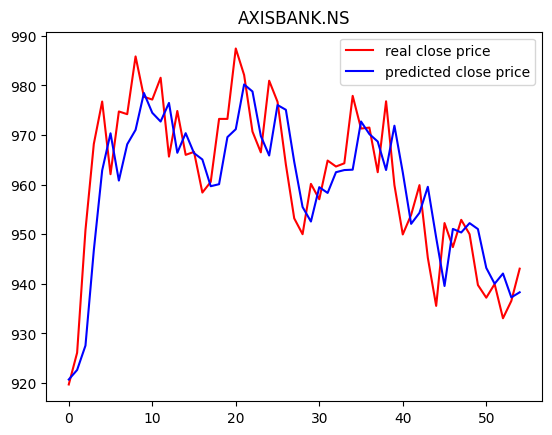

In [33]:
plt.plot(realCP, color= 'r', label= 'real close price')
plt.plot(pred, color= 'b', label= 'predicted close price')
plt.title(company)
plt.legend()
plt.show()

In [34]:
realData= [modelInp[len(modelInp)+1-60:len(modelInp+1), 0]]

In [35]:
realData= np.array(realData)

In [36]:
realData= np.reshape(realData, newshape=(realData.shape[0], realData.shape[1], 1))

In [37]:
prediction= regressor.predict(realData)

1/1 [==============================] - 3s 3s/step


In [38]:
prediction= scaler.inverse_transform(prediction)

In [39]:
prediction

array([[943.72046]], dtype=float32)

In [40]:
# Load your Keras model
#model = tf.keras.models.load_model('../model/exports/ITC.NS/')

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(regressor)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.experimental_lower_tensor_list_ops = False  # Disable lowering of tensor list ops
tflite_model = converter.convert()

# Save the converted TensorFlow Lite model
tflite_model_path = f"D:\Code\Projects\stockSenseAPIv2\exports\hourly\{company}.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpwq9sb0j2\assets


INFO:tensorflow:Assets written to: C:\Users\Rohan\AppData\Local\Temp\tmpwq9sb0j2\assets
